# K-means clustering

## import library

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [31]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')
print(feature)

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))


[[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
number of data : 1000
number of feature : 2


## plot the input data

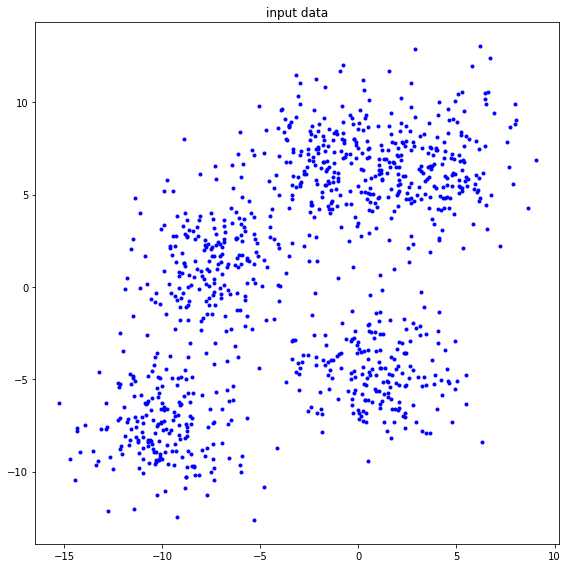

In [107]:
# ===================================================
# fill up the blank for plotting the data

plot_data(feature)

# ===================================================

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [58]:
def compute_distance(feature, center):
    # ===================================================
    # fill up the function body
    distance = np.zeros(shape=(number_data))
    
    for i in range(number_data):
        distance[i] = (sum((feature[i] - center)**2))**0.5
    
    # ===================================================
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [88]:

def compute_centroid(feature, label_feature, value_label):
    # ===================================================
    # fill up the function body
    # 주어진 value_label 과 같은 label을 가진 feature만 label_array 에 넣어서 centroid 계산!!
    centroid = np.zeros(shape=(number_feature))
    temp = []
    for i in range(number_data):
        if label_feature[i] == value_label:
            temp.append(feature[i])
    
    label_array = np.array(temp)
    centroid = np.mean(label_array, axis=0)  # compute centroid of value_label
    
    # ===================================================
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [89]:
def compute_label(distance):
    # ===================================================
    # fill up the function body
    
    index_label_feature = np.zeros(shape=(number_data))
    
    # np.argmin(): 최소값의 Index 반환!
    index_label_feature = np.argmin(distance, axis=1)

    # ===================================================
    return index_label_feature


In [90]:
def compute_loss(feature, label_feature, centroid):
    
    loss = 0
    
    for k in range(len(centroid)):
        center = centroid[k]
        temp = 0  # cluster label이 k의 loss 합
        for i in range(number_data):
            if label_feature[i] == k:  # i번 째 feature label이 k(cluster label)과 같으면 해당 center와 loss 계산
                temp += sum((feature[i] - center)**2)
        
        loss += temp
    loss = (1/number_data)*loss
    
    return loss

In [115]:

# fruits = np.array([['apple', 'banana', 'cherries'], ['durian', 'grapes', 'lemon']]).reshape(-1)
# # p = [0.1, 0, 0.2, 0.5, 0.1, 0.05, 0.05]
# print(np.random.choice(fruits, 3, replace=False))


# ===================================================
# assign the number of clusters and iterations
# k = 5
max_iter = 1000
number_cluster      = 5
number_iteration    = max_iter

# ===================================================

In [116]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))


# Initialization
rand_array = np.random.randint(number_data, size=(number_cluster))
for i in range(len(rand_array)):
    centroid[i] = feature[rand_array[i]]


for i in range(number_iteration):  # 10000

    for k in range(number_cluster):  # k
        # ===================================================
        # fill up the blank
        
        distance[:, k] = compute_distance(feature, center=centroid[k])
        label_feature = compute_label(distance)  # reshape?
        centroid[k, :] = compute_centroid(feature, label_feature, k)
        
        # ===================================================
    # ===================================================
    # fill up the blank

    centroid_iteration[i] = centroid
    loss_iteration[i] = compute_loss(feature, label_feature, centroid)
    

        
    
    # ===================================================

In [118]:
for i in range(number_iteration):
    print("{}: {}".format(i, loss_iteration[i]))




0: [13.67877238]
1: [11.51224678]
2: [8.82302089]
3: [7.90991002]
4: [7.70828278]
5: [7.68159605]
6: [7.67920215]
7: [7.67797846]
8: [7.67763925]
9: [7.67763925]
10: [7.67763925]
11: [7.67763925]
12: [7.67763925]
13: [7.67763925]
14: [7.67763925]
15: [7.67763925]
16: [7.67763925]
17: [7.67763925]
18: [7.67763925]
19: [7.67763925]
20: [7.67763925]
21: [7.67763925]
22: [7.67763925]
23: [7.67763925]
24: [7.67763925]
25: [7.67763925]
26: [7.67763925]
27: [7.67763925]
28: [7.67763925]
29: [7.67763925]
30: [7.67763925]
31: [7.67763925]
32: [7.67763925]
33: [7.67763925]
34: [7.67763925]
35: [7.67763925]
36: [7.67763925]
37: [7.67763925]
38: [7.67763925]
39: [7.67763925]
40: [7.67763925]
41: [7.67763925]
42: [7.67763925]
43: [7.67763925]
44: [7.67763925]
45: [7.67763925]
46: [7.67763925]
47: [7.67763925]
48: [7.67763925]
49: [7.67763925]
50: [7.67763925]
51: [7.67763925]
52: [7.67763925]
53: [7.67763925]
54: [7.67763925]
55: [7.67763925]
56: [7.67763925]
57: [7.67763925]
58: [7.67763925]
59: [

## plot the results

In [119]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    plt.plot(x, y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()

In [120]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
   
    plt.plot(loss_iteration, '-', color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [184]:

def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    # ===================================================
    # fill up the blank
    if number_cluster == 5:
        colors = ["firebrick", "gold", "darkorange", "limegreen", "cornflowerblue"]
    elif number_cluster == 10:
        colors = ["firebrick", "gold", "darkorange", "limegreen", "cornflowerblue", "darkcyan", "purple", "deeppink", "sienna", "darkgrey"]
        
    # initial
    plt.plot(centroid_iteration[0, :, 0], centroid_iteration[0, :, 1], 'o', color='blue', label='initial')
    # final
    plt.plot(centroid_iteration[number_iteration-1, :, 0], centroid_iteration[number_iteration-1, :, 1], 's', color='red', label='final')

    # 
    for k, c in zip(range(number_cluster), colors):
        plt.plot(centroid_iteration[:, k, 0], centroid_iteration[:, k, 1], '-', color=c, label='cluster='+str(k))


    plt.xlabel('iteration')
    plt.legend(loc='right')
    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [223]:
def plot_cluster(feature, label_feature, number_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    # fill up the blank
    
    # count of label
    count = {}  # {0: cnt_L0, 1: cnt_L1, *** }
    label = {}

    for i in range(number_cluster):
        count[i] = 0
    for i in range(number_data):
        count[label_feature[i]] += 1
    # 각 label 마다 value 값으로 (count of label, 2) 크기의 np.array를 갖고 있음
    for i in range(number_cluster):
#         label[i] = []
        label[i] = np.zeros(shape=(count[i], number_feature))


    for k, c in count.items():  # k: label, c: count
        cnt = 0
        for i in range(number_data):  
            if label_feature[i] == k:
                label[k][cnt] = feature[i]
                cnt += 1
        
    # scatter
    if number_cluster == 5:
        colors = ["firebrick", "gold", "darkorange", "limegreen", "cornflowerblue"]
    elif number_cluster == 10:
        colors = ["firebrick", "gold", "darkorange", "limegreen", "cornflowerblue", "darkcyan", "purple", "deeppink", "sienna", "darkgrey"]
    
    F = list(label.values())
    for f, c in zip(F, colors):
        plt.scatter(f[:,0], f[:,1], color=c)
            
    plt.colorbar()

    # ===================================================
    plt.tight_layout()
    plt.show()




***

# results

***

1. plot the input data

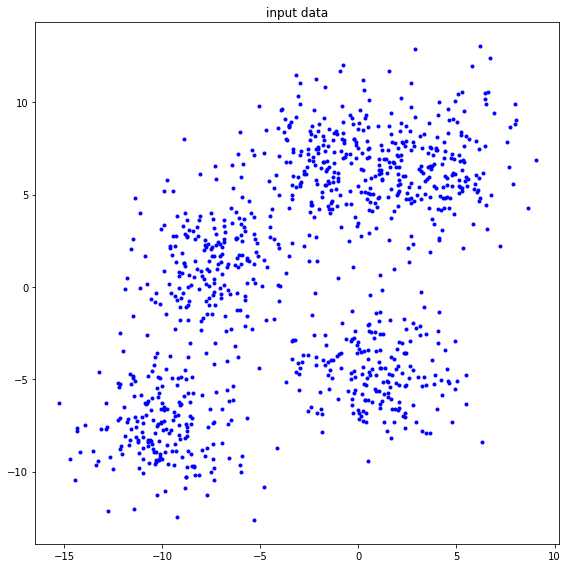

In [164]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

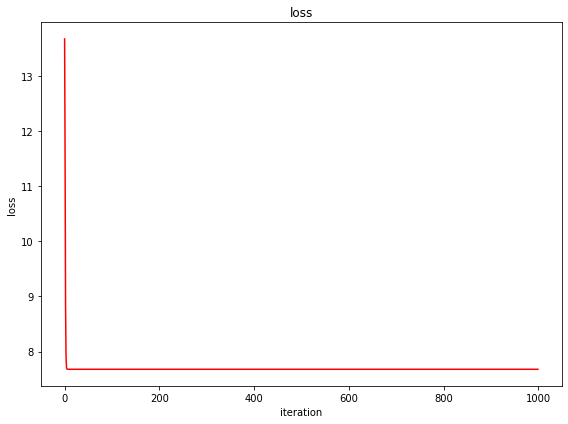

In [165]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

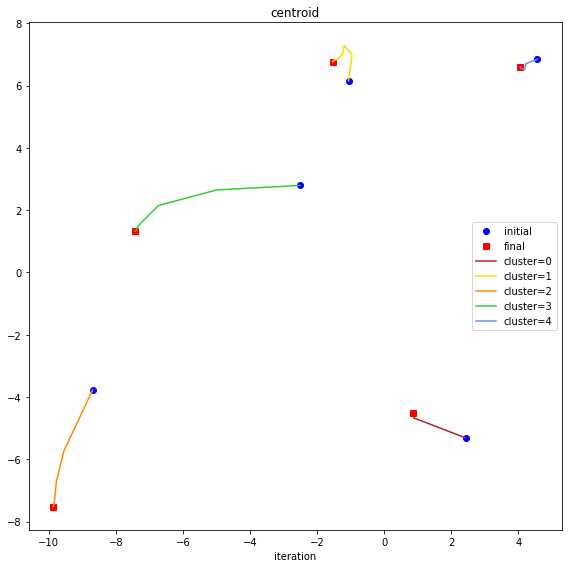

In [224]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

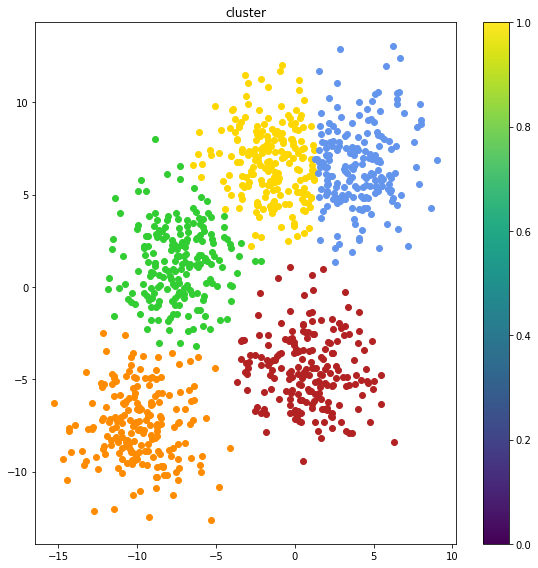

In [225]:
plot_cluster(feature, label_feature, number_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

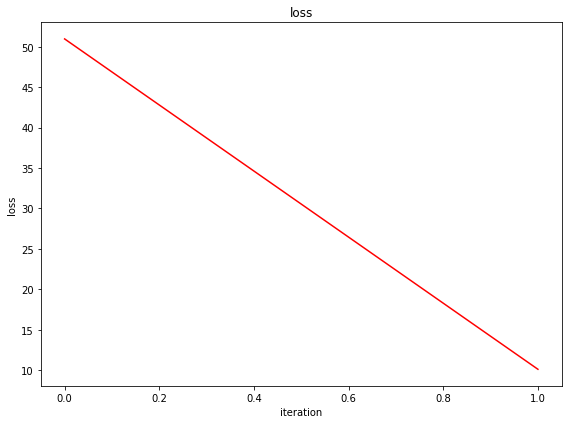

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

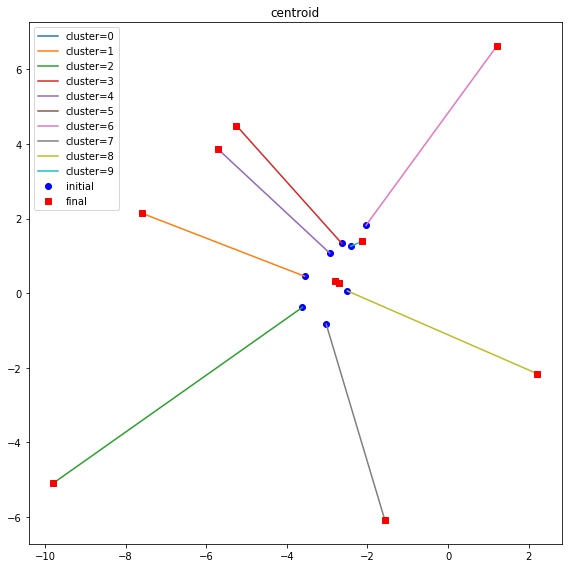

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

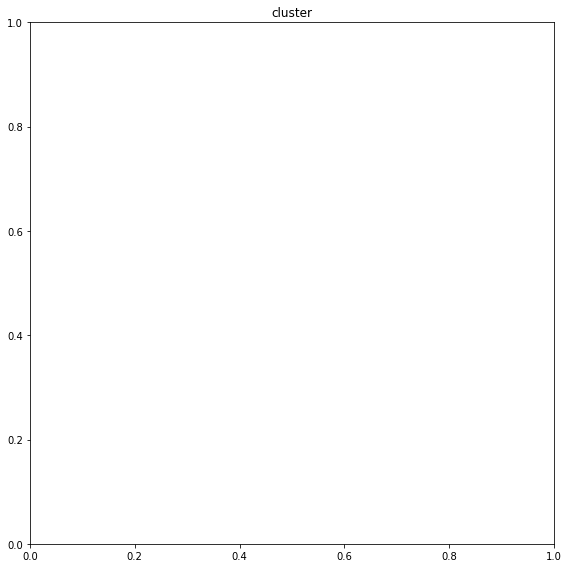

In [177]:
plot_cluster(feature, label_feature, number_cluster)

***